In [20]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input,test_target) = imdb.load_data(num_words =500) # 리뷰 데이터의 단어를 빈도순으로 1~500위 만 가져옴

In [21]:
train_input.shape

(25000,)

In [22]:
test_input.shape

(25000,)

In [23]:
# 리뷰 데이터는 어떤 사람은 길게 어떤 사람은 적게 나타날수
len(train_input[0])

218

In [24]:
len(train_input[1])

189

In [25]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target,val_target = train_test_split(train_input,train_target,test_size=0.2)

import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen =100)
val_seq = pad_sequences(val_input,maxlen=100)

In [26]:
train_seq.shape # 그러면 데이터가 2만개인데 100개의 단어로 딱 맞춰짐. 무조건 단어의 갯수

(20000, 100)

In [27]:
from tensorflow import keras
model = keras.Sequential() # 인공 신경망 도화지
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500))) # 8개의 RNN 층
model.add(keras.layers.Dense(1,activation='sigmoid')) # 1개로 간다! /1:긍정리뷰  , 0: 부정리뷰 ->sigmoid

In [28]:
train_seq[0]

array([  2, 297, 305,   7,   2,  27, 119,  18,   2, 143,   2,  53, 400,
        74,  24,   4,   2,   2,   7,   4,   2,   9,   2,   2,  10,  10,
         4, 167,  47,   2,   8,  97,   6,   2, 200,   2, 113,   5,   4,
         2, 297,   2, 113,  14,   9,  35,   2,   2,  21,   2,   4,   2,
        19,   4,   2,   7,   4,   2, 297,   2,   2,  11,  85,   2,   2,
        89,   4, 167,   2,  44,   2,  10,  10,  61,   2,   9,  24,   2,
         2,   2,   9,  21,  13,   2, 181,   8,   2,  11,   4,   2,   7,
         4, 167,   5, 156,  54,   2, 159,   2,   2], dtype=int32)

In [29]:
# 이게 리뷰 임.
# 하나만 1이고 나머지는 0 인 값으로 바꿔 컴퓨터가 평등하게 보도록
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [30]:
train_oh.shape # 2만개의 리뷰 100개의 행의 500개의 리뷰

(20000, 100, 500)

In [31]:
train_oh[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
# 한줄이 단어
# 단어를 500개를 꺼냇기에 500열
# 단어는 100개 밖에 없기 때문에 100개의 행
# -> input_sshape(100,500)


Epoch 1/100
625/625 [==============================] - 16s 24ms/step - loss: 0.6865 - accuracy: 0.5518 - val_loss: 0.6797 - val_accuracy: 0.5694
Epoch 2/100
625/625 [==============================] - 15s 23ms/step - loss: 0.6474 - accuracy: 0.6405 - val_loss: 0.6301 - val_accuracy: 0.6460
Epoch 3/100
625/625 [==============================] - 15s 23ms/step - loss: 0.5434 - accuracy: 0.7393 - val_loss: 0.5170 - val_accuracy: 0.7564
Epoch 4/100
625/625 [==============================] - 15s 23ms/step - loss: 0.4966 - accuracy: 0.7710 - val_loss: 0.5074 - val_accuracy: 0.7624
Epoch 5/100
625/625 [==============================] - 15s 23ms/step - loss: 0.4690 - accuracy: 0.7861 - val_loss: 0.4906 - val_accuracy: 0.7756
Epoch 6/100
625/625 [==============================] - 15s 23ms/step - loss: 0.4510 - accuracy: 0.7969 - val_loss: 0.4944 - val_accuracy: 0.7680


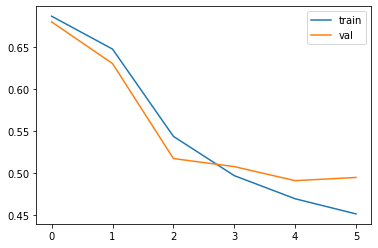

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

early_stopping = keras.callbacks.EarlyStopping(patience =1 , restore_best_weights=True)

history=model.fit(train_oh,train_target, epochs=100,validation_data=(val_oh,val_target),callbacks=[early_stopping])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [ ]:
# 리뷰 정확도 78%.....
# 되게 잘 학습됨?? 왜 난 76퍼정도..... ㅇㅅㅇ